# Given the dataset of advertising Predict sales based on different kinds of ads

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
import warnings 
warnings.filterwarnings('ignore')


In [10]:
data=pd.read_csv("Advertising.csv")
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [12]:
# Relationship between Sales and TV ads

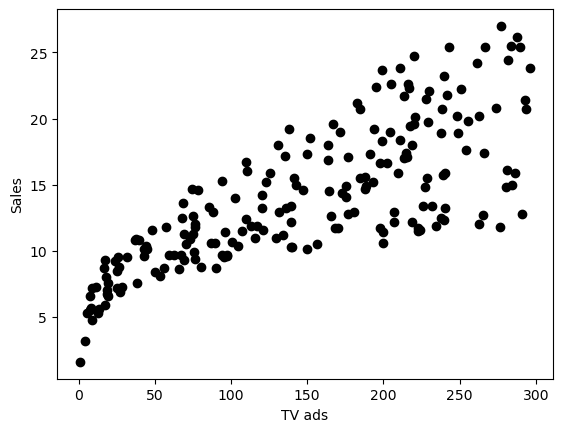

In [14]:
plt.figure()
plt.scatter(data["TV"],data["sales"],c="black")
plt.xlabel("TV ads")
plt.ylabel("Sales")
plt.show()

In [16]:
# Relationship between Sales and Radio ads

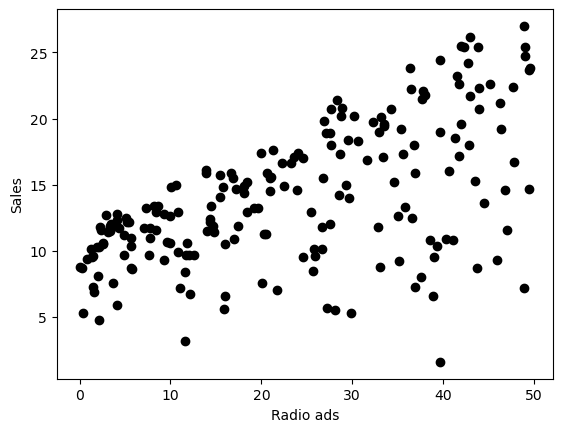

In [18]:
plt.figure()
plt.scatter(data["radio"],data["sales"],c="black")
plt.xlabel("Radio ads")
plt.ylabel("Sales")
plt.show()

In [24]:
X=data.drop(['sales','Unnamed: 0'],axis=1)
y=data['sales']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.25)
reg=LinearRegression()
reg.fit(X_train,y_train)


LinearRegression()

In [38]:
y_train_pred=reg.predict(X_train)
y_test_pred= reg.predict(X_test)

# Calculate r_square on train data
r2=r2_score(y_train,y_train_pred)
print(f"R^2 score: {r2}")

# Calculate r_square on test data
r2=r2_score(y_test,y_test_pred)
print(f"R^2 score: {r2}")


R^2 score: 0.9196173613612616
R^2 score: 0.8161246292537998


In [40]:
rmse_train=mean_squared_error(y_train,y_train_pred, squared=False)
rmse_test=mean_squared_error(y_test,y_test_pred, squared=False)
print("MSE Train:", {round(rmse_train,1)})
print("MSE Test:", {round(rmse_test,1)})


MSE Train: {1.5}
MSE Test: {2.2}


In [42]:
X=data.drop(['sales','Unnamed: 0'],axis=1)
y=data['sales']

X2=sm.add_constant(X)
est= sm.OLS(y,X2)

model=est.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 03 Aug 2025   Prob (F-statistic):           1.58e-96
Time:                        04:06:52   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

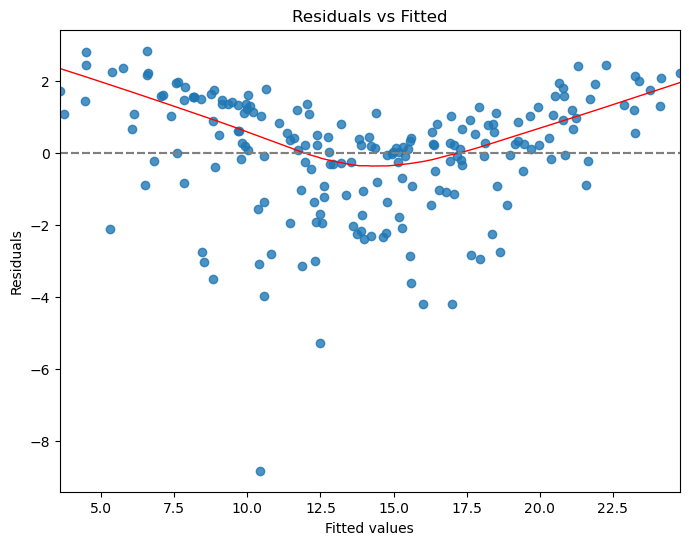

In [52]:
# 1.Residual plot 

plt.figure(figsize=(8,6))
sns.residplot(x=model.fittedvalues,y=model.resid,lowess=True,line_kws={'color':'red','lw':1})
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.axhline(0,color='gray',linestyle='--')
plt.show()

# Residual Plot 
### Checks for linearity and homoscedasticity(constant variance). Residuals should ideally be randomly scattered around zero with no clear pattern.

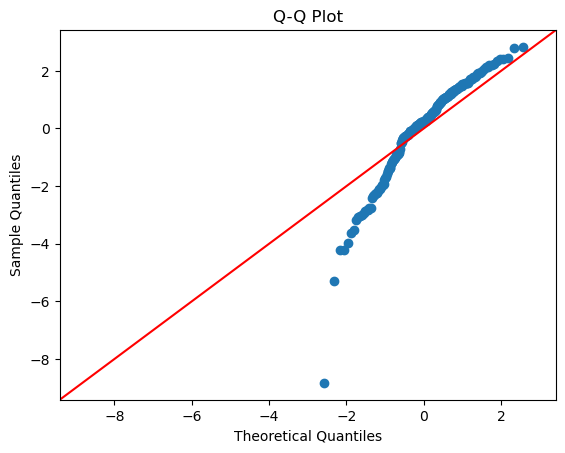

In [55]:
sm.qqplot(model.resid,line='45')
plt.title("Q-Q Plot")
plt.show()

# Q-Q model
### Tests if residuals follow a normal distribution. Residuals should lie close to the diagonal line if the are normally distributed. 

# Cook's Distance for Influental Points

In [60]:
influence= model.get_influence()
cooks_d, _ =influence.cooks_distance

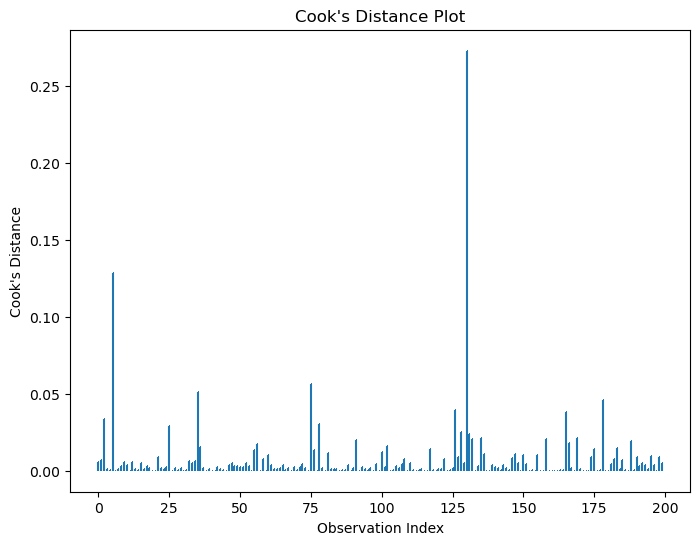

In [66]:
plt.figure(figsize=(8,6))
plt.stem(np.arange(len(cooks_d)),cooks_d, markerfmt=",",basefmt=" ")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.show()

# Cook's distance plot: 
### Identifies influential data points. Observations with high Cook's distance may unduly influence the model.


In [71]:
# Varience Inflation Factor (VIF) for Multicollinearity 
# Add more variables to X if needed for checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["feature"]=X2.columns
vif_data["VIF"]=[variance_inflation_factor(X2.values,i) for i in range (X2.shape[1])]
print(vif_data)


     feature       VIF
0      const  6.848900
1         TV  1.004611
2      radio  1.144952
3  newspaper  1.145187


# Checks for multicollinearity among predictors. A VIF value greater than 5 (sometimes 10) indicates potential multicollinearity issues.